In [45]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
def I(s):
    # returns the exact value of the integral Is
    return (2**s * np.cos(2*np.pi + s/2) * np.sin(1/2)**s)

In [42]:
def Q(s, n):
    # returns the Monte-Carlo estimation of the Integral Is
    # for dimension s and number of samples n
    def f(t):
        return (np.cos(2 * np.pi * np.sum(t)))

    t = np.random.uniform(low=0.0, high=1.0, size=(n,s))

    return (1/n * np.sum([f(i) for i in t]))

In [43]:
def error(I, Q):

    return np.abs(I-Q)

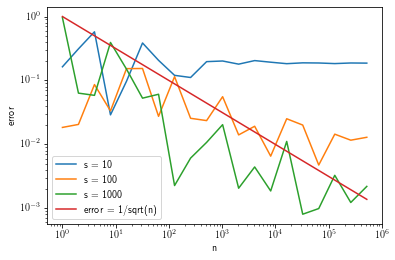

In [48]:
n_s = [10**i for i in range(1, 4)]
n_k = 20

for s in n_s:
    err = []
    for k in range(n_k):
        n = 2**k

        q = Q(s, n)
        i = I(s)
        err.append(error(i, q))

    plt.loglog([2**k for k in range(n_k)], err, label="s = {}".format(s))

plt.loglog([2**k for k in range(n_k)], [2**(-k/2) for k in range(n_k)], label="error = 1/sqrt(n)")
plt.legend()
plt.xlabel("n")
plt.ylabel("error")
plt.show()

One can observe that the error decreases as the number of samples increases.
The larger the dimension, the further the error decreases.